Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection & Processing

In [4]:
gold_df = pd.read_csv(r"C:\Users\Nariman Al Kharusi\Desktop\Data Science\Datasets\gld_price_data.csv")
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_df.shape

(2290, 6)

In [7]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_df.isnull().any()

Date       False
SPX        False
GLD        False
USO        False
SLV        False
EUR/USD    False
dtype: bool

In [9]:
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Statistical Analysis

<AxesSubplot:>

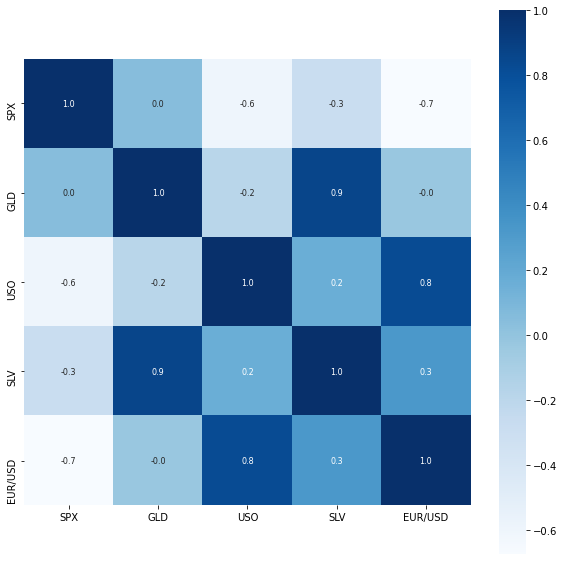

In [13]:
correlation = gold_df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

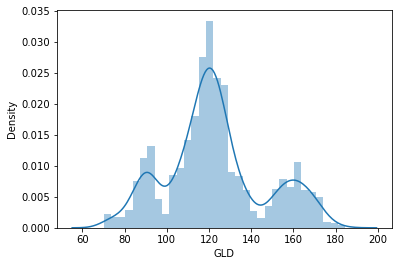

In [14]:
#dist. of the price of gold
sns.distplot(gold_df['GLD'])

In [15]:
input_data = gold_df.drop(['Date','GLD'], axis = 1)
g_price = gold_df['GLD']

Splitting data into a Training set and a Testing set 

In [16]:
x_train, x_test, y_train, y_test = train_test_split(input_data, g_price, test_size = 0.3, random_state = 2)

Implementing the Random Forest Regressor Model

In [17]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [19]:
pred = model.predict(x_test)
eval_model = metrics.r2_score(y_test, pred)
print("R squared error : ", f'{eval_model:.4f}')

R squared error :  0.9895


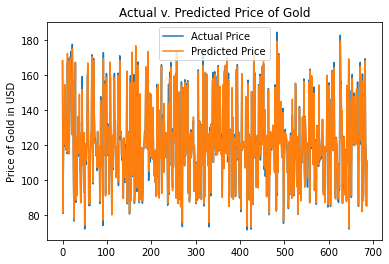

In [22]:
y_test_list = list(y_test)
plt.plot(y_test_list, label = 'Actual Price')
plt.plot(pred, label = 'Predicted Price')
plt.title('Actual v. Predicted Price of Gold')
plt.ylabel('Price of Gold in USD')
plt.legend()
plt.show()